# **Data Flow in Convolutional Layer**

In [4]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import torch
import torch.nn as nn
import torchinfo
from scipy.signal import convolve2d
from sklearn.datasets import load_sample_image

plt.rcParams["text.usetex"] = True
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.left"] = False
plt.rcParams["axes.spines.bottom"] = False

plt.style.use("seaborn-v0_8-whitegrid")

### **1D Convolution**  
For a continuous function $f(x)$ and a kernel $g(x)$, the convolution is defined as:  
$$
(f * g)(x) = \int_{-\infty}^{\infty} f(t) g(x - t) \, dt
$$  
For discrete signals, the convolution is given by:  
$$
(f * g)[n] = \sum_{m=-\infty}^{\infty} f[m] g[n - m]
$$  
where $f[m]$ is the input signal and $g[m]$ is the kernel (or filter).

Convolution is like sliding a small window (a filter) over a signal or an image and combining values in a specific way to extract useful patterns. In 1D, it's like smoothing or sharpening a sound wave. In 2D (images), it helps detect edges, blur, sharpen, or highlight features. In convolutional neural networks (CNNs), it’s how computers recognize patterns like shapes, textures, and objects in images.

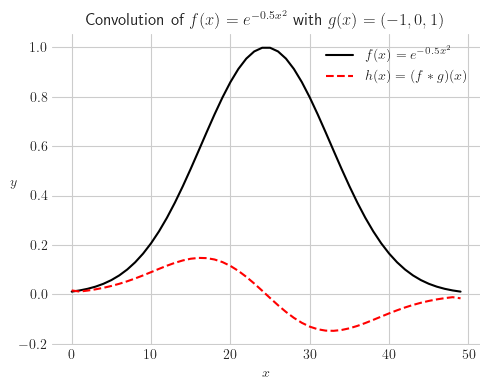

In [13]:
x = sp.symbols("x")
f = sp.exp(-0.5 * x**2)
g = (-1, 0, 1)

vf = sp.lambdify(x, f)(np.linspace(-3, 3, 50))
vh = np.convolve(vf, g[::-1], mode="same")

plt.figure(figsize=(5, 4), tight_layout=True)
plt.plot(vf, c="black", ls="-", label=rf"$f(x) = {sp.latex(f)}$")
plt.plot(vh, c="red", ls="--", label=r"$h(x) = (f*g)(x)$")
plt.xlabel(r"$x$")
plt.ylabel(r"$y$", rotation=0)
plt.title(rf"Convolution of $f(x) = {sp.latex(f)}$ with $g(x) = (-1, 0, 1)$")
plt.legend(loc="upper right")
plt.show()

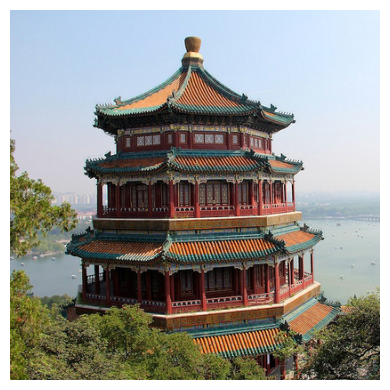

In [6]:
image = load_sample_image("china.jpg")
image = image[:416, :416]

plt.figure(figsize=(4, 4), tight_layout=True)
plt.imshow(image)
plt.axis("off")
plt.show()

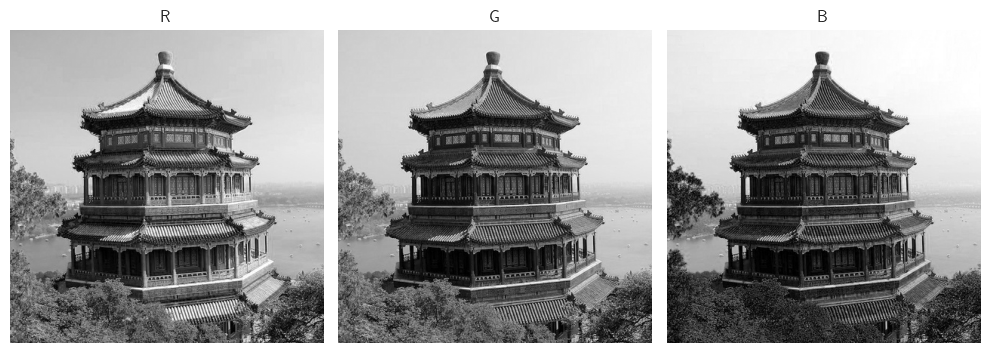

In [7]:
plt.figure(figsize=(10, 4), tight_layout=True)
plt.subplot(1, 3, 1)
plt.imshow(image[..., 0], cmap="gray")
plt.axis("off")
plt.title("R")
plt.subplot(1, 3, 2)
plt.imshow(image[..., 1], cmap="gray")
plt.axis("off")
plt.title("G")
plt.subplot(1, 3, 3)
plt.imshow(image[..., 2], cmap="gray")
plt.axis("off")
plt.title("B")
plt.show()

### **Convolution in Image Processing**  
In 2D image processing, convolution is used for filtering an image with a kernel $K$. The discrete 2D convolution for an image $I(x, y)$ and kernel $K(x, y)$ is:  
$$
(I * K)(x, y) = \sum_{i=-k}^{k} \sum_{j=-k}^{k} I(x-i, y-j) K(i, j)
$$  
where the kernel slides over the image, computing weighted sums of pixel intensities.  

### **Convolution in CNNs**  
In convolutional neural networks, convolutional layers apply multiple trainable kernels to input images. This allows CNNs to extract features such as edges, textures, and shapes. The output of a convolutional layer is given by:  
$$
Z_{ij}^{(l)} = \sum_{m=0}^{k-1} \sum_{n=0}^{k-1} W_{mn}^{(l)} X_{(i+m)(j+n)} + b^{(l)}
$$  
where:  
- $X$ is the input,  
- $W$ is the kernel (weights),  
- $b$ is the bias,  
- $Z$ is the output feature map,  
- $k$ is the kernel size.  

This operation helps CNNs detect spatial patterns and hierarchically learn representations, making them highly effective for image classification, object detection, and segmentation.

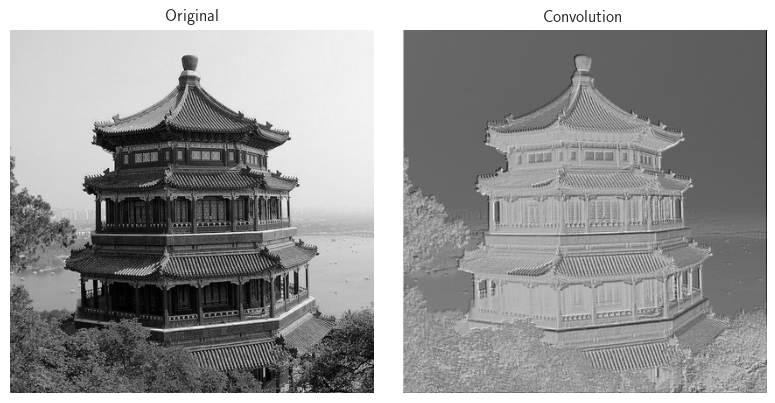

In [8]:
kernel = np.array([[1, 0, 0], [0, -1, 0], [0, 0, -1]])

image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
image_conv = convolve2d(image_gray, kernel, mode="same")

plt.figure(figsize=(8, 4), tight_layout=True)
plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap="gray")
plt.axis("off")
plt.title("Original")
plt.subplot(1, 2, 2)
plt.imshow(image_conv, cmap="gray")
plt.axis("off")
plt.title("Convolution")
plt.show()

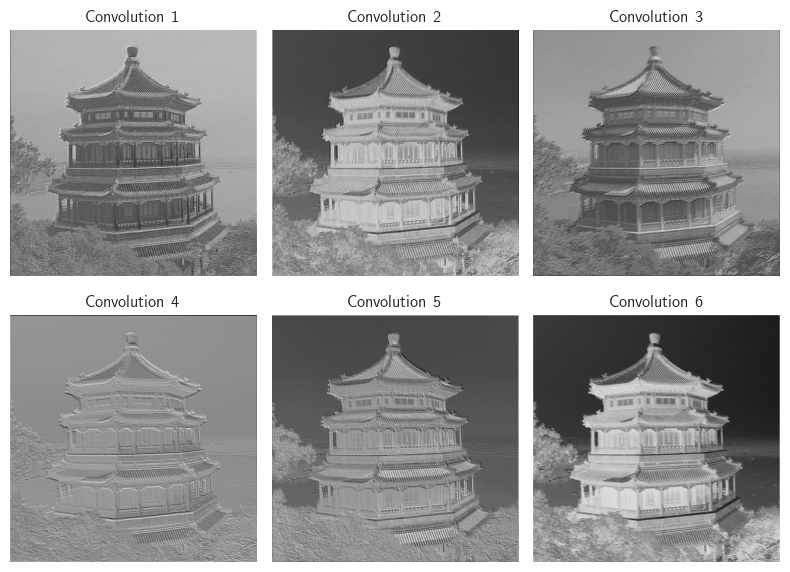

In [9]:
image_tensor = torch.tensor(image, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0)

in_channels = 3
out_channels = 6

conv = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1)
conv_tensor = conv(image_tensor).int().squeeze().permute(1, 2, 0).numpy()

plt.figure(figsize=(8, 6), tight_layout=True)

for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(conv_tensor[..., i], cmap="gray")
    plt.axis("off")
    plt.title(f"Convolution {i + 1}")

plt.show()

In [10]:
# 6 filters, each with 3 channels, each with 3x3 weights (kernel_size=3) + 6 biases (for each filter)
6 + 6 * 3 * (3 * 3)

168

In [11]:
n_params = sum(p.numel() for p in conv.parameters())
print(f"Number of parameters: {n_params}")

Number of parameters: 168


In [12]:
torchinfo.summary(conv, input_size=(1, 3, 416, 416))

Layer (type:depth-idx)                   Output Shape              Param #
Conv2d                                   [1, 6, 416, 416]          168
Total params: 168
Trainable params: 168
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 29.07
Input size (MB): 2.08
Forward/backward pass size (MB): 8.31
Params size (MB): 0.00
Estimated Total Size (MB): 10.38